In [ ]:
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt

import import_ipynb
from connect_to_db import db_cnx
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
from connect_to_db import db_cnx

import warnings
warnings.filterwarnings("ignore")

In [ ]:
class HexMaps():
    
    def get_coords(self, df, col_name, min_, max_, long_min, long_max, inclusive=True):
        '''
        gets the coordinates for each city in order to plot them in the map
        col_name; choose either the long or lat column
        min_, max_; are for the first column, if both long and lat columns are used 
        then long_min, long_max are used for the extra column coordinates
        Since Sheffield has the same latitude as Liverpool and the same longitude as Leeds 
        both longitude and latitude if statement was added to account for that
        '''
        
        self.new_df = df[df[col_name].between(min_, max_, inclusive=inclusive)]
        
        # for if both long and lat are provided
        if long_min is not None and long_max is not None:
            self.new_df = self.new_df[self.new_df['longitude'].between(long_min, long_max, inclusive=inclusive)]
        

        return self.new_df.shape
    
    def plot_hexmap(self, df, color_continuous_scale, marker_color, nx_hexagon, size):
        
        # getting an api token
        px.set_mapbox_access_token('pk.eyJ1IjoibHpqZCIsImEiOiJja3hrcjFldjkxOWFvMnB1YjRkYXRwOXA5In0.MF_PBu1CBZsOnbzy6NWasA')
        
        # making the plot
        fig = ff.create_hexbin_mapbox(
        data_frame=self.new_df, lat='latitude', lon='longitude',
        nx_hexagon=nx_hexagon, opacity=0.7,
        min_count=1, color_continuous_scale=color_continuous_scale,
        show_original_data=True, # this plots data too
        original_data_marker=dict(size=size, opacity=0.1, color=marker_color)
        )
        
        fig.show()
        
        return
        
hm = HexMaps()

# London 

In [ ]:
# indexing by date
london = pd.read_csv(
    '/Users/vasilina/Desktop/cfg_group_project/data/london_sample.csv',
    #index_col=0,
    parse_dates=[0]
    )

In [ ]:
# visualizzing all the values
sns.pairplot(london[[
    'month', 'covid', 'longitude', 'lsoa_code', 'latitude', 'stringency',
    'crimes_count'
]],
             palette='tab10',
             diag_kind='kde')

In [ ]:
# plotting hexmap
px.set_mapbox_access_token('pk.eyJ1IjoibHpqZCIsImEiOiJja3hrcjFldjkxOWFvMnB1YjRkYXRwOXA5In0.MF_PBu1CBZsOnbzy6NWasA')
fig = ff.create_hexbin_mapbox(
    data_frame=london, lat='latitude', lon='longitude',
    nx_hexagon=30, opacity=0.8,
    min_count=1, color_continuous_scale='viridis',
    show_original_data=True,
    original_data_marker=dict(size=2, opacity=0.1, color='lightgrey')
)
fig.show()

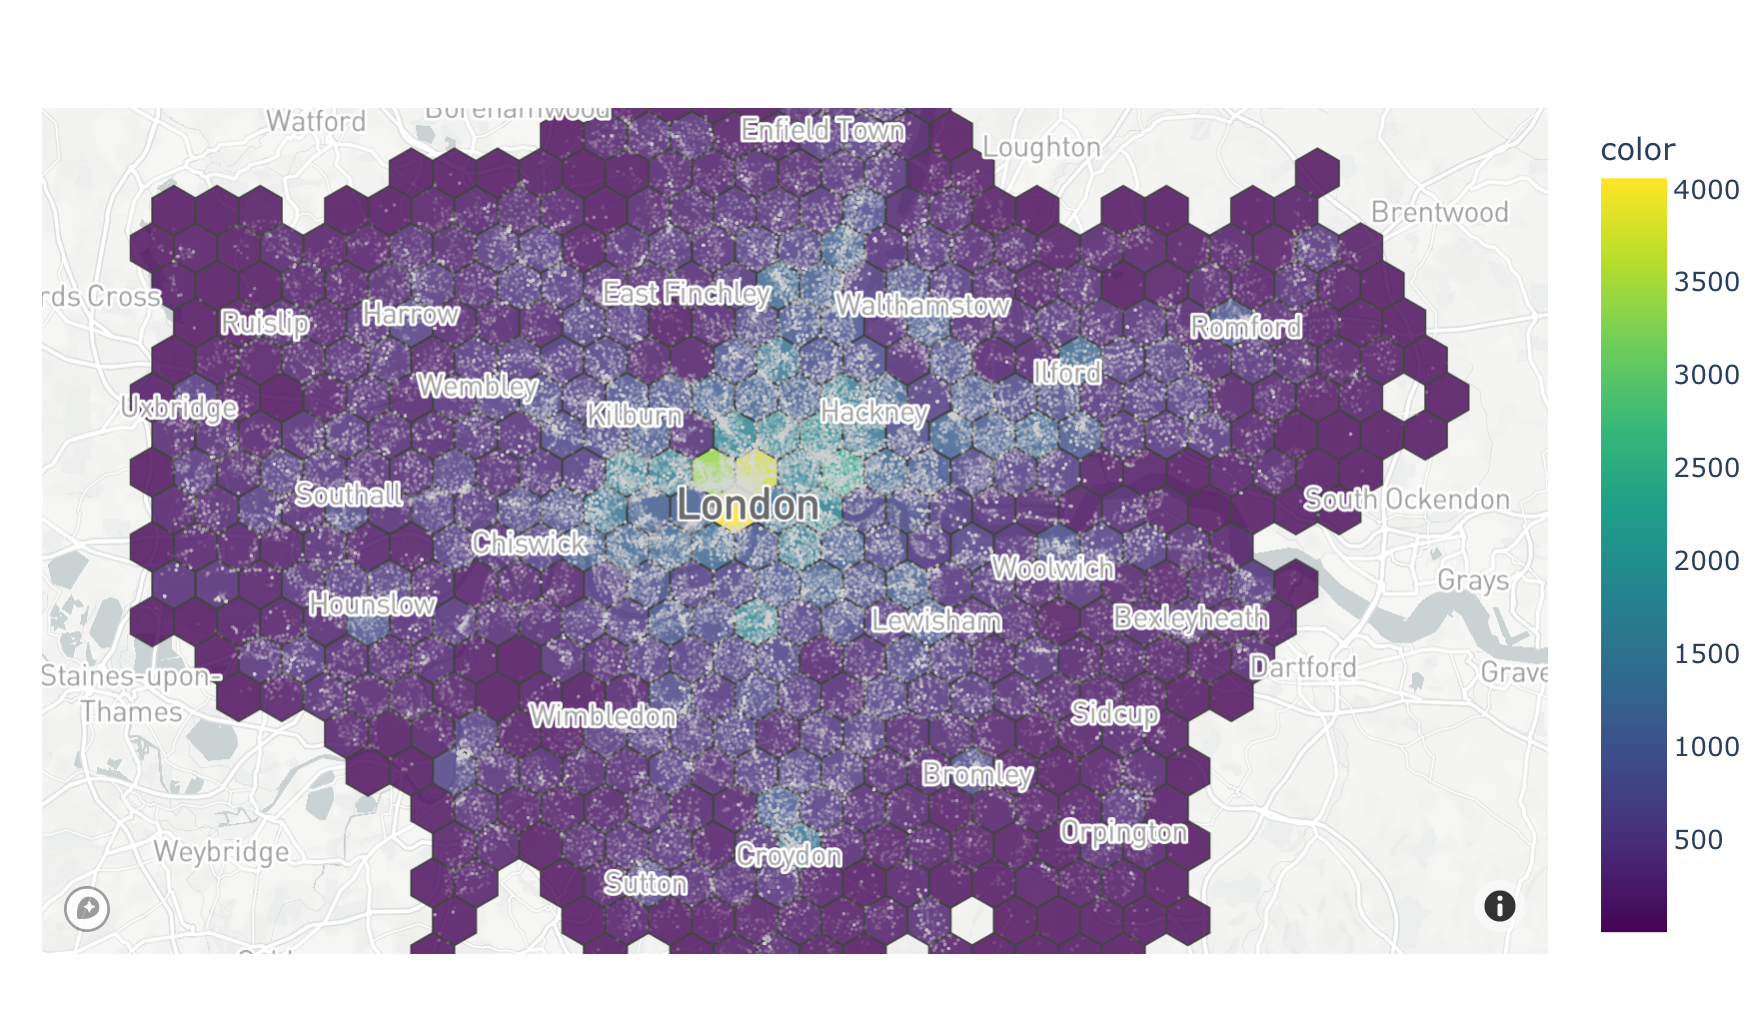

In [1]:
from IPython.display import Image
london_image='./hexmap pics/london.png'
Image(london_image)

# Other Cities

In [ ]:
# increasing the number of samples to ensure enough data is taken for all 5 cities since 
# sheffield has less datapoints
db_cnx.select_random('other_cities_all', '600000')

In [ ]:
db_cnx.df.to_csv('/Users/vasilina/Desktop/cfg_group_project/data/other_cities_sample_hexmap.csv')

In [ ]:
other = pd.read_csv('/Users/vasilina/Desktop/cfg_group_project/data/other_cities_sample_hexmap.csv', parse_dates=[0])

In [ ]:
sns.pairplot(other[[
    'month', 'covid', 'longitude', 'lsoa_code', 'latitude', 'stringency',
    'crimes_count'
]],
             palette='tab10',
             diag_kind='kde')

In [ ]:
# for liverpool
# because liverpool and sheffield have same latitudes we calculate liverpool using longitude
hm.get_coords(other, 'longitude', -3.002089, -2.721728, None, None, True)
hm.plot_hexmap(hm.new_df, 'viridis', 'lightgrey', nx_hexagon=20, size=2)

In [ ]:
# for sheffield both long and lat are added
hm.get_coords(other, 'latitude', 53.371753, 53.389485, -1.488213, -1.456624, True)
hm.plot_hexmap(hm.new_df, 'viridis', 'lightgrey', nx_hexagon=10, size=3)

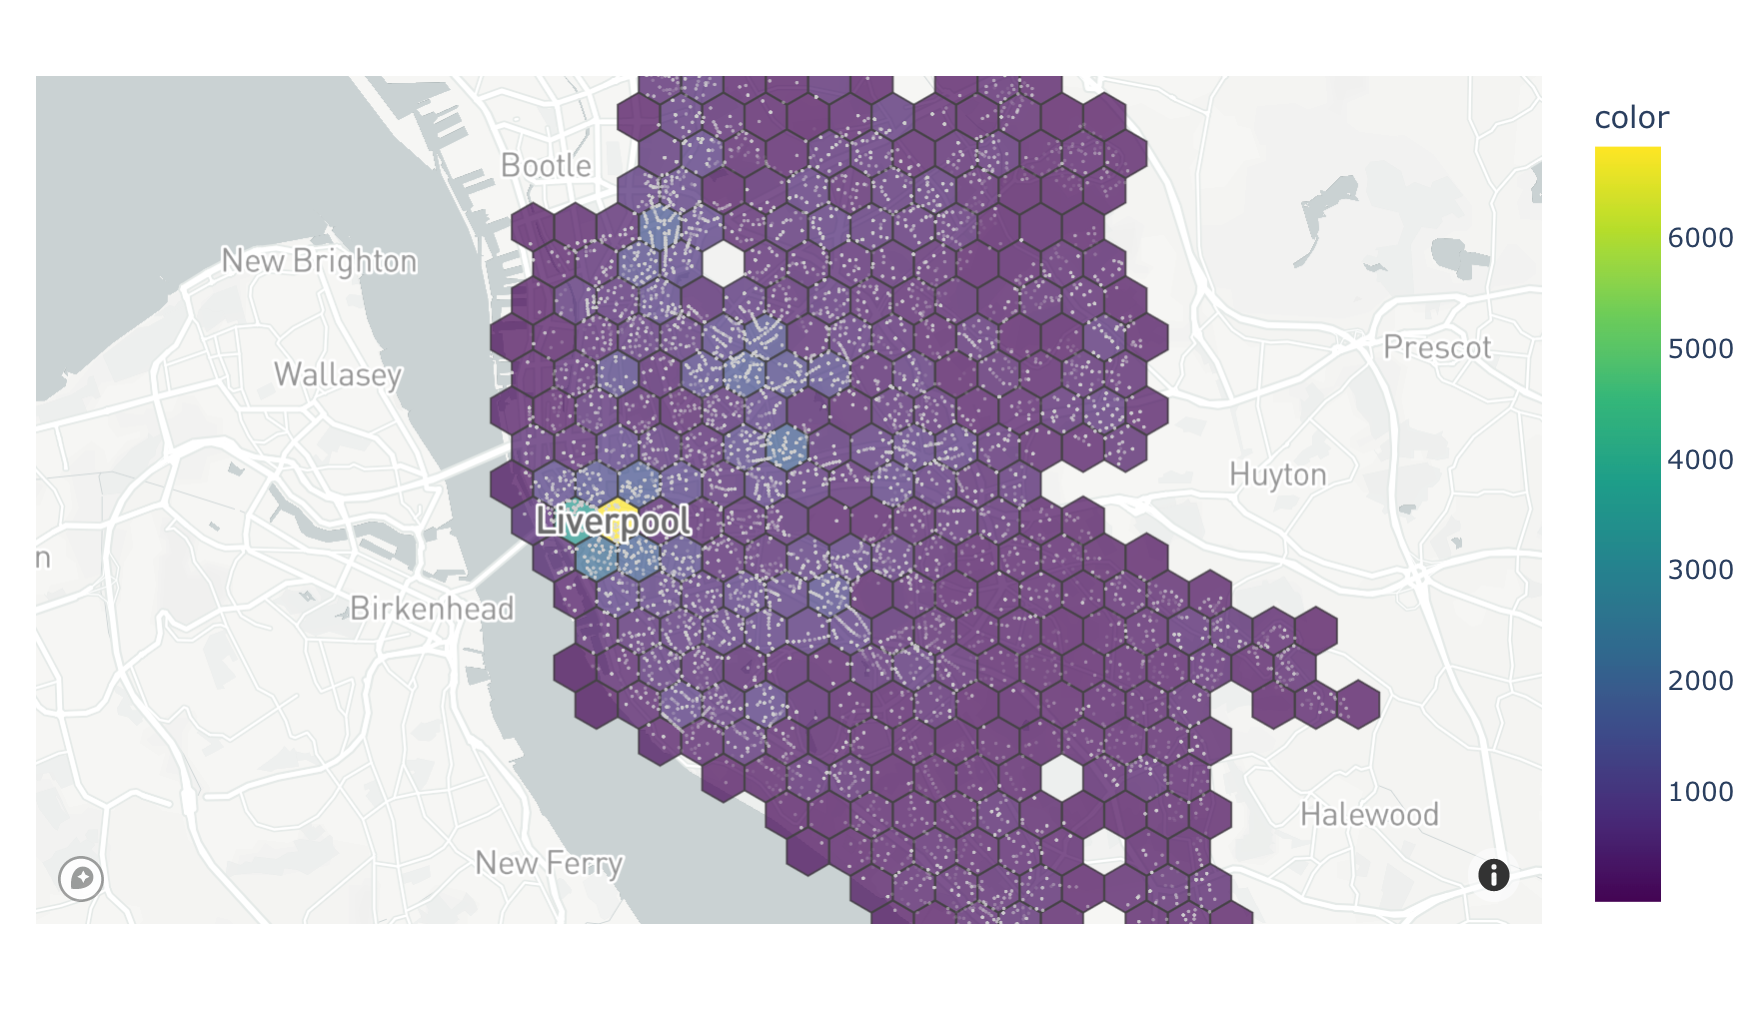

In [2]:
from IPython.display import Image
liverpool_image='./hexmap pics/liverpool.png'
Image(liverpool_image)

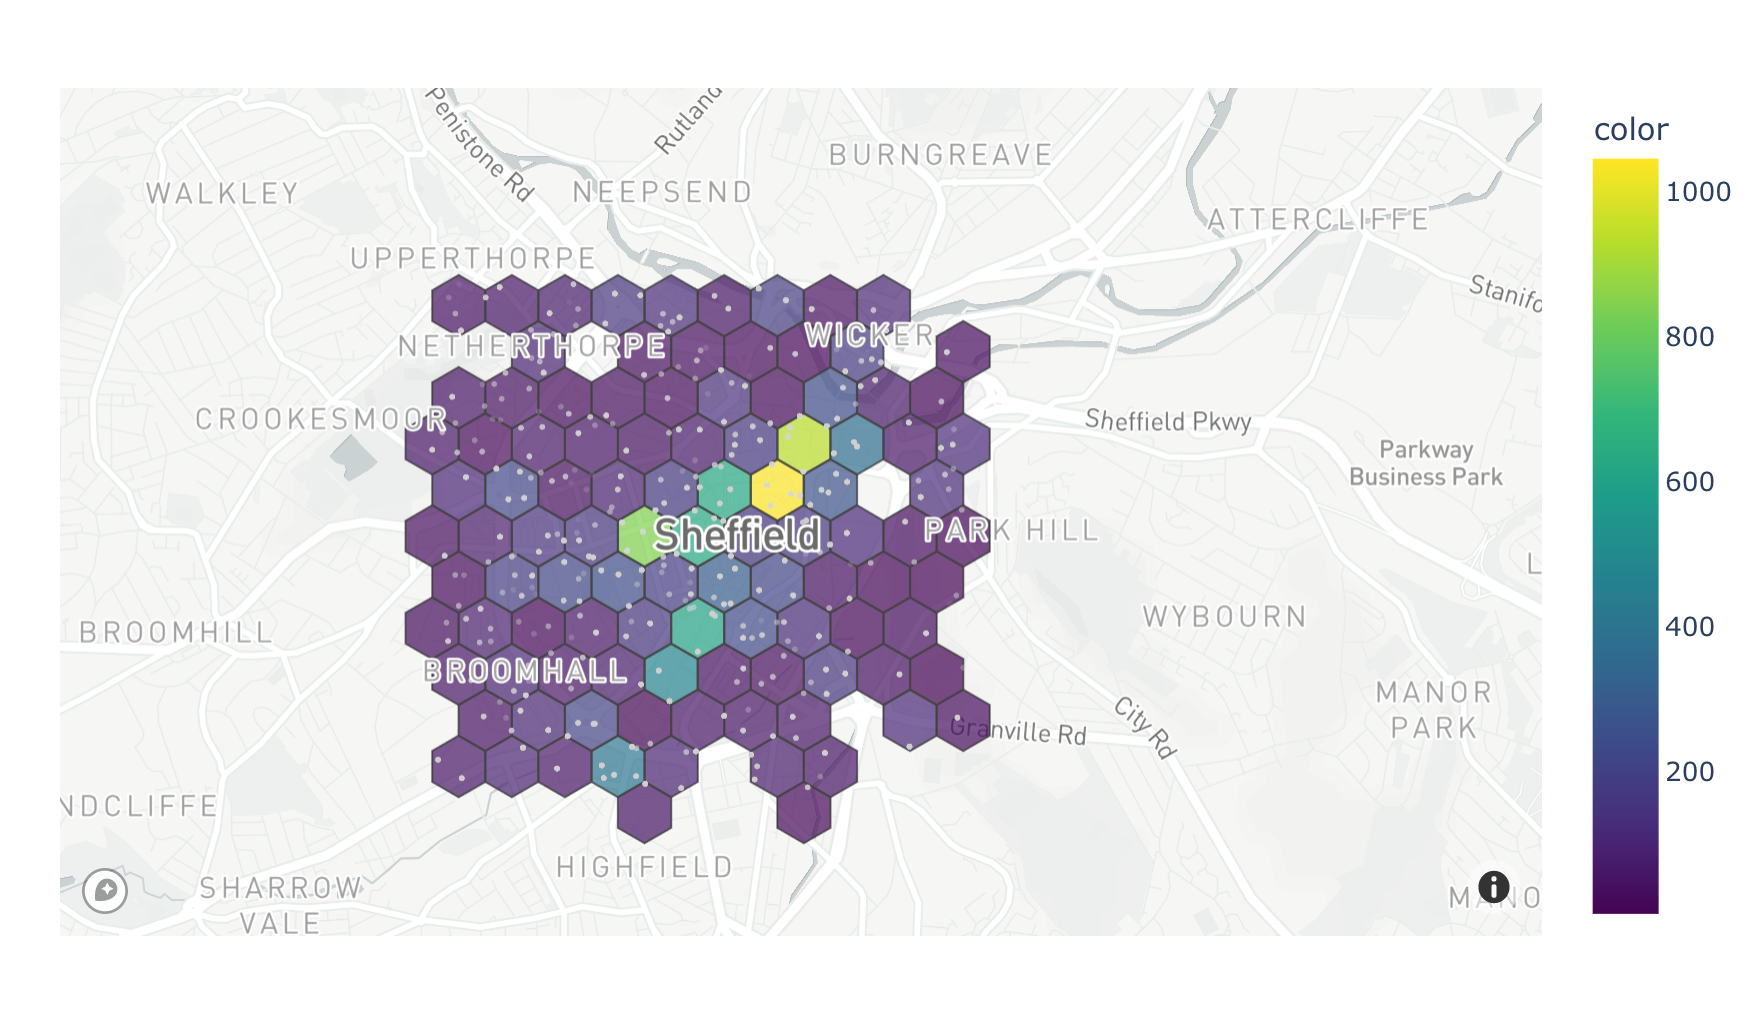

In [3]:
sheffield_image='./hexmap pics/sheffield.png'
Image(sheffield_image)

In [ ]:
# for leeds and bradford
hm.get_coords(other, 'latitude', 53.706637, 53.963169, None, None, True)
hm.plot_hexmap(hm.new_df, 'viridis', 'lightgrey', nx_hexagon=20, size=2)

In [ ]:
# for bristol
hm.get_coords(other, 'latitude', 51.406637, 51.653169, None, None, True)
hm.plot_hexmap(hm.new_df, 'viridis', 'lightgrey', nx_hexagon=20, size=2)

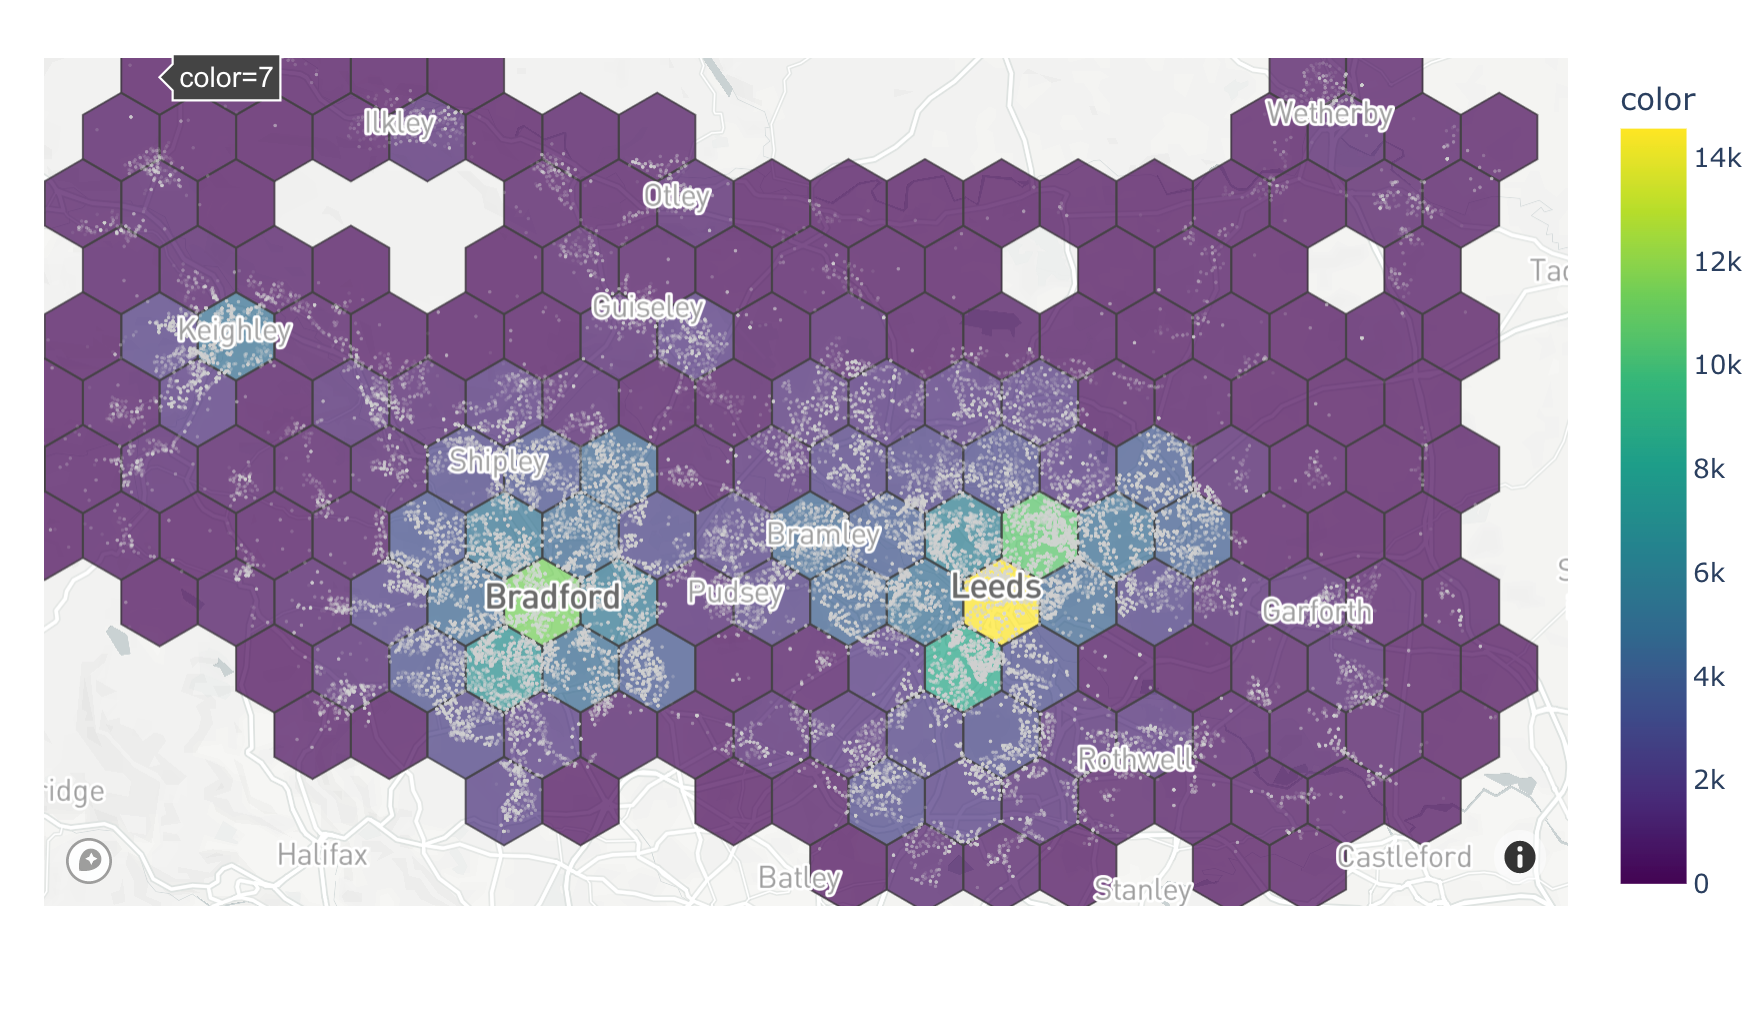

In [4]:
leeds_bradfod_image='./hexmap pics/leeds_bradfod.png'
Image(leeds_bradfod_image)

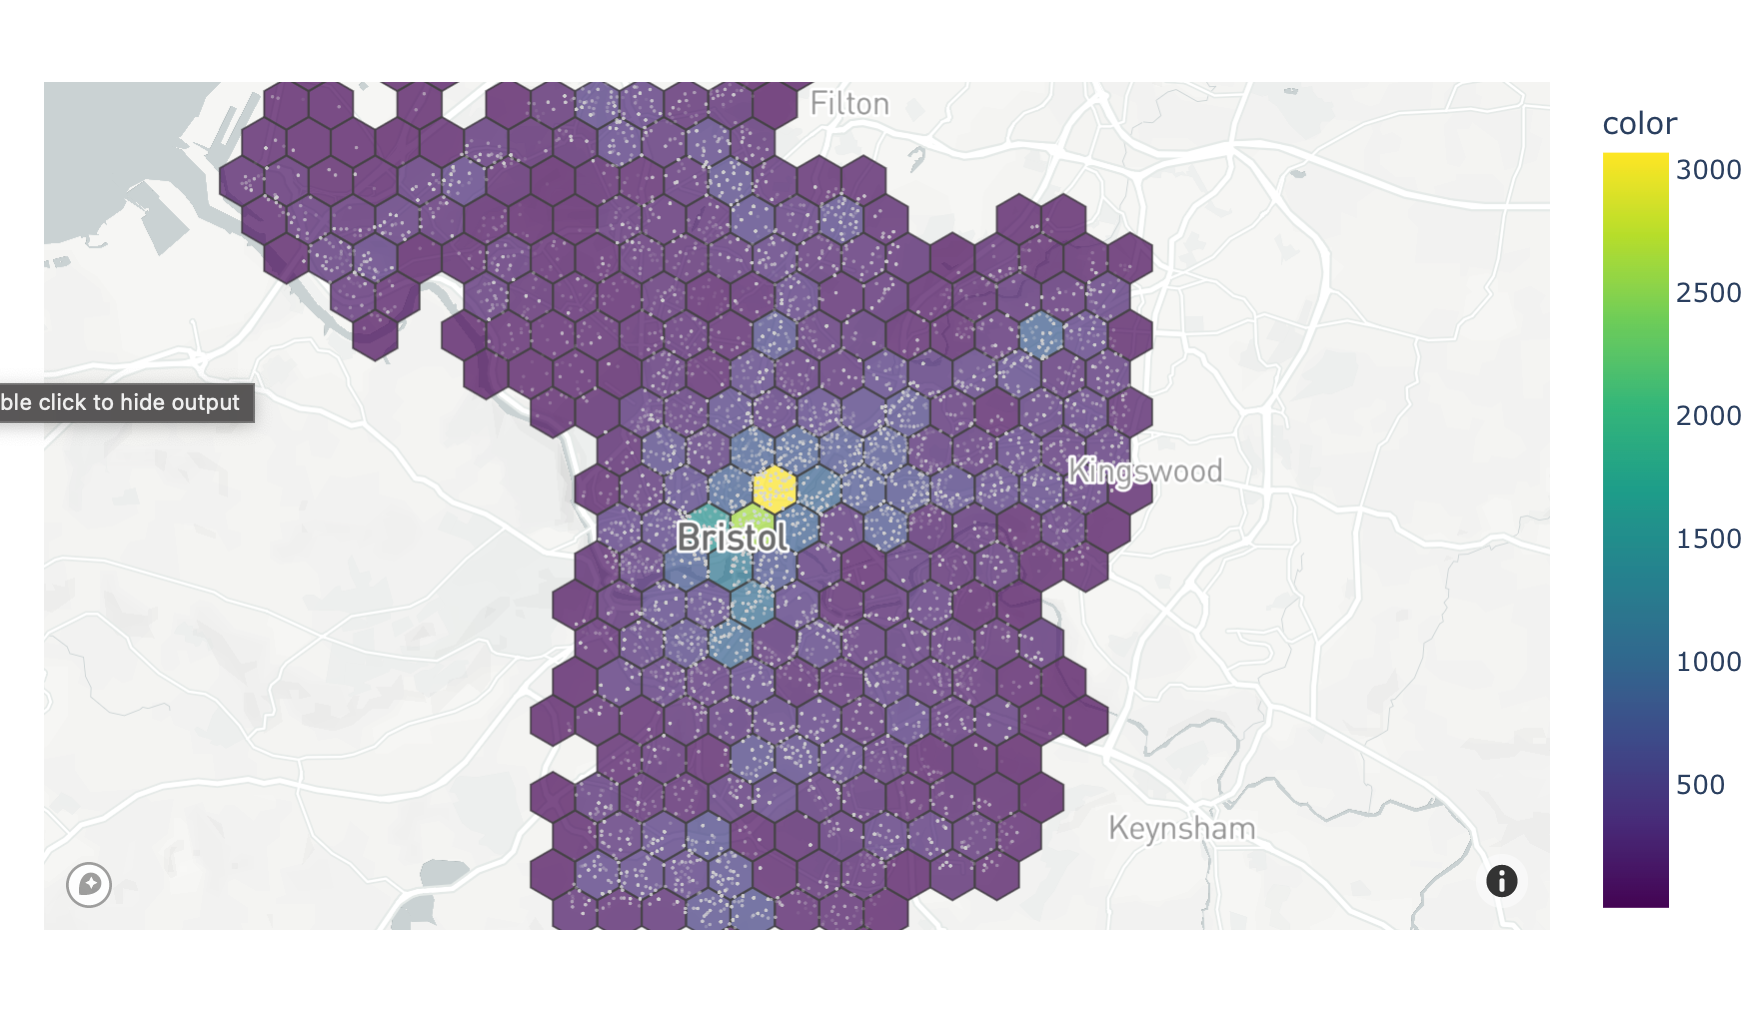

In [5]:
bristol_image='./hexmap pics/bristol.png'
Image(bristol_image)